# Herbs Classification

Training a model that can classify images of herbs which are ginger (jahe), turmeric (kunyit), galangal (lengkuas), and aromatic ginger (kencur). The project is using the CNN algorithm in TensorFlow which will extract features in images.

## Libraries

In [1]:
import os
import cv2
import random
import shutil
from shutil import copyfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.applications import MobileNet
import matplotlib.pyplot as plt

## Preparation

Prepare directories, split data into train and validation data, make generators, and make model.

### Preparing Directories

In [2]:
# Define base dir
base_dir = 'Dataset - Coba'

source_path_jahe = os.path.join(base_dir, 'Jahe')
source_path_kunyit = os.path.join(base_dir, 'Kunyit')
source_path_lengkuas = os.path.join(base_dir, 'Lengkuas')
source_path_kencur = os.path.join(base_dir, 'Kencur')

# Checking how many images in each directories
print(f"There are {len(os.listdir(source_path_jahe))} images of jahe.")
print(f"There are {len(os.listdir(source_path_kunyit))} images of kunyit.")
print(f"There are {len(os.listdir(source_path_lengkuas))} images of lengkuas.")
# print(f"There are {len(os.listdir(source_path_kencur))} images of kencur.")

There are 584 images of jahe.
There are 526 images of kunyit.
There are 596 images of lengkuas.


#### Make Sub-directories

In [3]:
# Define root directory
root_dir = 'Dataset - Coba\Herbs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and validation sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """

  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')

  os.makedirs(train_dir)
  os.makedirs(validation_dir)

  train_jahe_dir = os.path.join(train_dir, 'Jahe')
  train_kunyit_dir = os.path.join(train_dir, 'Kunyit')
  train_lengkuas_dir = os.path.join(train_dir, 'Lengkuas')
  # train_kencur_dir = os.path.join(train_dir, 'Kencur')

  os.makedirs(train_jahe_dir)
  os.makedirs(train_kunyit_dir)
  os.makedirs(train_lengkuas_dir)
  # os.makedirs(train_kencur_dir)
  
  validation_jahe_dir = os.path.join(validation_dir, 'Jahe')
  validation_kunyit_dir = os.path.join(validation_dir, 'Kunyit')
  validation_lengkuas_dir = os.path.join(validation_dir, 'Lengkuas')
  # validation_kencur_dir = os.path.join(validation_dir, 'Kencur')

  os.makedirs(validation_jahe_dir)
  os.makedirs(validation_kunyit_dir)
  os.makedirs(validation_lengkuas_dir)
  # os.makedirs(validation_kencur_dir)

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

### Split Data

In [4]:
# Testi create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

Dataset - Coba\Herbs\training
Dataset - Coba\Herbs\validation
Dataset - Coba\Herbs\training\Jahe
Dataset - Coba\Herbs\training\Kunyit
Dataset - Coba\Herbs\training\Lengkuas
Dataset - Coba\Herbs\validation\Jahe
Dataset - Coba\Herbs\validation\Kunyit
Dataset - Coba\Herbs\validation\Lengkuas


In [5]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    """
    Splits the data into train and validation sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None
    """

    # Count files in source directory
    source_dir_files_count = len(os.listdir(SOURCE_DIR))
    # Define the size of train data
    train_files_count = round(source_dir_files_count * SPLIT_SIZE)
    # Randomize the data
    shuffled_list = random.sample(os.listdir(SOURCE_DIR), source_dir_files_count)

    for filename in shuffled_list[:train_files_count]:
        filesource = os.path.join(SOURCE_DIR, filename)
        filedest = os.path.join(TRAINING_DIR, filename)
        if os.path.getsize(filesource) == 0:
            print("{} filename is zero length, so ignoring.".format(filename))
        else:
            copyfile(filesource, filedest)

    for filename in shuffled_list[train_files_count:]:
        filesource = os.path.join(SOURCE_DIR, filename)
        filedest = os.path.join(VALIDATION_DIR, filename)
        if os.path.getsize(filesource) == 0:
            print("{} filename is zero length, so ignoring.".format(filename))
        else:
            copyfile(filesource, filedest)

In [6]:
# Test split_data function

# Define paths to original dataset
JAHE_SOURCE_DIR = 'Dataset - Coba\\Jahe'
KUNYIT_SOURCE_DIR = 'Dataset - Coba\\Kunyit'
LENGKUAS_SOURCE_DIR = 'Dataset - Coba\\Lengkuas'
KENCUR_SOURCE_DIR = 'Dataset - Coba\\Kencur'

TRAINING_DIR = 'Dataset - Coba\\Herbs\\training\\'
VALIDATION_DIR = 'Dataset - Coba\\Herbs\\validation\\'

TRAINING_JAHE_DIR = os.path.join(TRAINING_DIR, 'Jahe\\')
VALIDATION_JAHE_DIR = os.path.join(VALIDATION_DIR, 'Jahe\\')

TRAINING_KUNYIT_DIR = os.path.join(TRAINING_DIR, 'Kunyit\\')
VALIDATION_KUNYIT_DIR = os.path.join(VALIDATION_DIR, 'Kunyit\\')

TRAINING_LENGKUAS_DIR = os.path.join(TRAINING_DIR, 'Lengkuas\\')
VALIDATION_LENGKUAS_DIR = os.path.join(VALIDATION_DIR, 'Lengkuas\\')

TRAINING_KENCUR_DIR = os.path.join(TRAINING_DIR, 'Kencur\\')
VALIDATION_KENCUR_DIR = os.path.join(VALIDATION_DIR, 'Kencur\\')

# Empty directories in case this cell executed multiple times
# For train dir
if len(os.listdir(TRAINING_JAHE_DIR)) > 0:
  for file in os.scandir(TRAINING_JAHE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KUNYIT_DIR)) > 0:
  for file in os.scandir(TRAINING_KUNYIT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LENGKUAS_DIR)) > 0:
  for file in os.scandir(TRAINING_LENGKUAS_DIR):
    os.remove(file.path)
# if len(os.listdir(TRAINING_KENCUR_DIR)) > 0:
#   for file in os.scandir(TRAINING_KENCUR_DIR):
#     os.remove(file.path)

# For validation dir
if len(os.listdir(VALIDATION_JAHE_DIR)) > 0:
  for file in os.scandir(VALIDATION_JAHE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KUNYIT_DIR)) > 0:
  for file in os.scandir(VALIDATION_KUNYIT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LENGKUAS_DIR)) > 0:
  for file in os.scandir(VALIDATION_LENGKUAS_DIR):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_KENCUR_DIR)) > 0:
#   for file in os.scandir(VALIDATION_KENCUR_DIR):
#     os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
split_data(JAHE_SOURCE_DIR, TRAINING_JAHE_DIR, VALIDATION_JAHE_DIR, split_size)
split_data(KUNYIT_SOURCE_DIR, TRAINING_KUNYIT_DIR, VALIDATION_KUNYIT_DIR, split_size)
split_data(LENGKUAS_SOURCE_DIR, TRAINING_LENGKUAS_DIR, VALIDATION_LENGKUAS_DIR, split_size)
# split_data(KENCUR_SOURCE_DIR, TRAINING_KENCUR_DIR, VALIDATION_KENCUR_DIR, split_size)

# Check how many files in original images directories
print(f"\n\nOriginal jahe's directory has {len(os.listdir(JAHE_SOURCE_DIR))} images")
print(f"Original kunyit's directory has {len(os.listdir(KUNYIT_SOURCE_DIR))} images")
print(f"Original lengkuas' directory has {len(os.listdir(LENGKUAS_SOURCE_DIR))} images")
# print(f"Original kencur's directory has {len(os.listdir(KENCUR_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_JAHE_DIR))} images of jahe for training")
print(f"There are {len(os.listdir(TRAINING_KUNYIT_DIR))} images of kunyit for training")
print(f"There are {len(os.listdir(TRAINING_LENGKUAS_DIR))} images of lengkuas for training")
# print(f"There are {len(os.listdir(TRAINING_KENCUR_DIR))} images of kencur for training")
print(f"There are {len(os.listdir(VALIDATION_JAHE_DIR))} images of jahe for validation")
print(f"There are {len(os.listdir(VALIDATION_KUNYIT_DIR))} images of kunyit for validation")
print(f"There are {len(os.listdir(VALIDATION_LENGKUAS_DIR))} images of lengkuas for validation")
# print(f"There are {len(os.listdir(VALIDATION_KENCUR_DIR))} images of kencur for validation")



Original jahe's directory has 584 images
Original kunyit's directory has 526 images
Original lengkuas' directory has 596 images
There are 526 images of jahe for training
There are 473 images of kunyit for training
There are 536 images of lengkuas for training
There are 58 images of jahe for validation
There are 53 images of kunyit for validation
There are 60 images of lengkuas for validation


Sample jahe image:


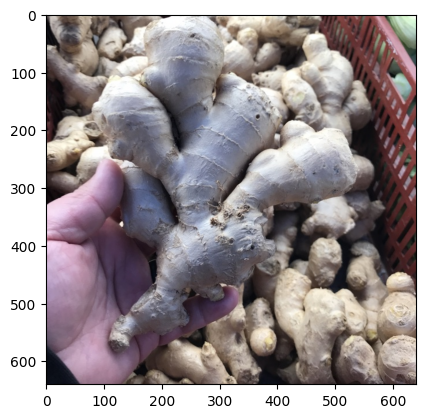


Sample kunyit image:


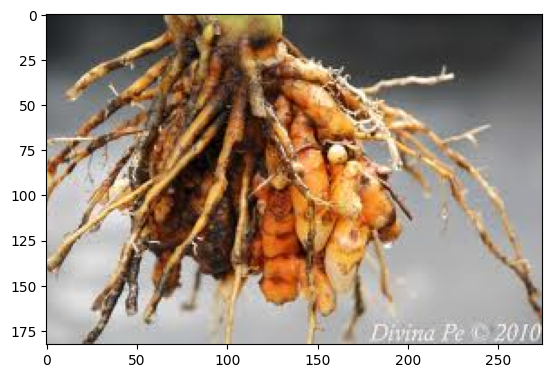


Sample lengkuas image:


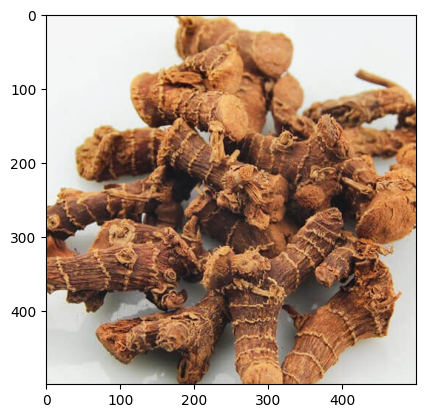

In [7]:
# Take a look at a sample image of each one of the classes

print("Sample jahe image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_JAHE_DIR, os.listdir(TRAINING_JAHE_DIR)[0])}"))
plt.show()

print("\nSample kunyit image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_KUNYIT_DIR, os.listdir(TRAINING_KUNYIT_DIR)[0])}"))
plt.show()

print("\nSample lengkuas image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_LENGKUAS_DIR, os.listdir(TRAINING_LENGKUAS_DIR)[0])}"))
plt.show()

# print("\nSample kencur image:")
# plt.imshow(load_img(f"{os.path.join(TRAINING_KENCUR_DIR, os.listdir(TRAINING_KENCUR_DIR)[0])}"))
# plt.show()

### Make generators

The generators will yield batches of images, both for training and validation.

In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=30,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=30,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
# Test the generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1535 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


### Make Model

#### Transfer Learning using MobileNet

In [10]:
# Define the input shape for your images
input_shape = (224, 224, 3)

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Print the summary of the base model
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

#### Add layers

In [11]:
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1280, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1280)              1312000   
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 4,544,707
Trainable params: 1,315,843
Non-trainable params: 3,228,864
_________________________________________________________________


## Training

In [16]:
with tf.device('/gpu:0'):
    # Train your model
    history = model.fit(train_generator,
                        epochs=20,
                        validation_data=validation_generator)

Epoch 1/20
 5/52 [=>............................] - ETA: 37s - loss: 4.0089 - accuracy: 0.4133

p:\needs\python\venv\comvis\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


52/52 [==============================] - 48s 878ms/step - loss: 1.3041 - accuracy: 0.6743 - val_loss: 0.6000 - val_accuracy: 0.7895
Epoch 2/20
52/52 [==============================] - 32s 625ms/step - loss: 0.4094 - accuracy: 0.8476 - val_loss: 0.5095 - val_accuracy: 0.8304
Epoch 3/20
52/52 [==============================] - 27s 511ms/step - loss: 0.3947 - accuracy: 0.8502 - val_loss: 0.5549 - val_accuracy: 0.7778
Epoch 4/20
52/52 [==============================] - 24s 453ms/step - loss: 0.3605 - accuracy: 0.8632 - val_loss: 0.5491 - val_accuracy: 0.8246
Epoch 5/20
52/52 [==============================] - 23s 439ms/step - loss: 0.3099 - accuracy: 0.8906 - val_loss: 0.5077 - val_accuracy: 0.8070
Epoch 6/20
52/52 [==============================] - 23s 443ms/step - loss: 0.2898 - accuracy: 0.8873 - val_loss: 0.5241 - val_accuracy: 0.8304
Epoch 7/20
52/52 [==============================] - 24s 451ms/step - loss: 0.2764 - accuracy: 0.9023 - val_loss: 0.4670 - val_accuracy: 0.8363
Epoch 8/20

## Evaluation

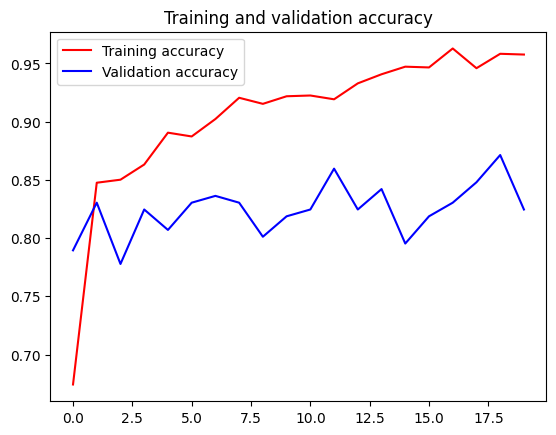

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [91]:
im = tf.keras.utils.load_img(r"Dataset - Coba\Herbs\training\Lengkuas\lengkuas_46.jpg", target_size=(224, 224))
input_arr = tf.keras.utils.img_to_array(im)
input_arr = np.expand_dims(input_arr, axis=0)
images = np.vstack([input_arr])
im.show()
predictions = model.predict(images, batch_size=10)

1/1 [==============================] - 0s 34ms/step


In [92]:
print(predictions)

[[2.2857495e-04 2.3477927e-02 9.7629356e-01]]


In [24]:
def myprint(s):
    with open('modelsummary.txt','a') as f:
        print(s, file=f)

model.summary(print_fn=myprint)